<a href="https://colab.research.google.com/github/vicky-getova/FYP/blob/main/ResNet%2BSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
# Mounting OneDrive to the notebook in order to load the dataset folder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [235]:
# Extracting the folder from OneDrive to a folder in a the notebook
!cp "/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB_data.zip" "ALL_IDB.zip"

In [236]:
# Unzipping the dataset folder in a new folder
!unzip -uq "ALL_IDB.zip" -d "ALL_IDB"

In [237]:
# Loading an image from the ALL_IDB1 file using cv2.imread() funnction.
# Input parameters: 
  #   path
  #   flag = 1 (to load a color image)

import cv2
image_color = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB/ALL_IDB2/ALL_IDB2/img/Im001_1.tif',1)

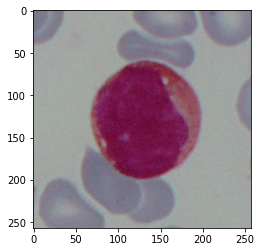

In [330]:
from matplotlib import pyplot as plt

# Plot test data as an image from the dataset uing imshow() function .
plt.imshow(image_color)
plt.show()

In [331]:
import os

# Return the current working directory using getcwd() method.
os.getcwd()

'/content'

In [332]:
# Get a list of all files the specified directory.
folders = os.listdir('/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB')

# Get a list of all images the ALL_IDB1 dataset.
items_all_idb1 = os.listdir('/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB/ALL_IDB1/ALL_IDB1/im')

# Get a list of all images the ALL_IDB2 dataset.
items_all_idb2 = os.listdir('/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB/ALL_IDB2/ALL_IDB2/img')

print("ALL folders in the ALL_IDB Database:", folders)
print("ALL items in the ALL_IDB1 dataset:", items_all_idb1)
print("ALL items in the ALL_IDB2 dataset:", items_all_idb2)

ALL folders in the ALL_IDB Database: ['ALL_IDB1', 'ALL_IDB2']
ALL items in the ALL_IDB1 dataset: ['Im001_1.jpg', 'Im005_1.jpg', 'Im002_1.jpg', 'Im009_1.jpg', 'Im007_1.jpg', 'Im010_1.jpg', 'Im004_1.jpg', 'Im003_1.jpg', 'Im006_1.jpg', 'Im008_1.jpg', 'Im011_1.jpg', 'Im012_1.jpg', 'Im024_1.jpg', 'Im027_1.jpg', 'Im013_1.jpg', 'Im032_1.jpg', 'Im031_1.jpg', 'Im021_1.jpg', 'Im036_0.jpg', 'Im015_1.jpg', 'Im023_1.jpg', 'Im018_1.jpg', 'Im014_1.jpg', 'Im017_1.jpg', 'Im025_1.jpg', 'Im029_1.jpg', 'Im034_0.jpg', 'Im026_1.jpg', 'Im030_1.jpg', 'Im022_1.jpg', 'Im020_1.jpg', 'Im033_1.jpg', 'Im035_0.jpg', 'Im019_1.jpg', 'Im028_1.jpg', 'Im016_1.jpg', 'Im038_0.jpg', 'Im037_0.jpg', 'Im039_0.jpg', 'Im043_0.jpg', 'Im044_0.jpg', 'Im045_0.jpg', 'Im046_0.jpg', 'Im042_0.jpg', 'Im041_0.jpg', 'Im040_0.jpg', 'Im056_1.jpg', 'Im054_1.jpg', 'Im055_1.jpg', 'Im049_1.jpg', 'Im051_1.jpg', 'Im050_1.jpg', 'Im048_1.jpg', 'Im047_0.jpg', 'Im053_1.jpg', 'Im052_1.jpg', 'Im059_1.jpg', 'Im060_1.jpg', 'Im058_1.jpg', 'Im062_1.jpg', 'I

In [333]:
import re

# Create a list of images with ALL cells of the format ImXXX_1.tif.
ALL_images = []
for image in items_all_idb2:
        if re.search('[A-Za-z0-9]+_[1]+\.[A-Za-z0-9]+', image): 
                ALL_images.append(image)
print('Number of ALL cancer images:', len(ALL_images))

# Create a list of images with healthy cells of the format ImXXX_0.tif.
healthy_images = []
for image in items_all_idb2:
        if re.search('[A-Za-z0-9]+_[0]+\.[A-Za-z0-9]+', image): 
                healthy_images.append(image)
print('Number of healthy cell images:', len(healthy_images))

Number of ALL cancer images: 130
Number of healthy cell images: 130


In [334]:
import cv2
# Create a list of ALL resized and RGB images using the resize() and cvtColor() methods. 
ALL_list = []
ALL_labels = []
for each_image in ALL_images:
  if each_image.endswith(".tif"):
    full_path = "/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB/ALL_IDB2/ALL_IDB2/img/" + each_image
    image = cv2.imread(full_path, 1)
    im_resized = cv2.resize(image, (512, 512), interpolation=cv2.INTER_LINEAR)
    im_converted = cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB)
    ALL_list.append(im_converted)
    label = int(full_path.split('_')[-1].split('.')[0])
    ALL_labels.append(label)

print('Number of ALL cancer images:', len(ALL_list))
print('Number of ALL labels:', len(ALL_labels))
print('ALL labels:', ALL_labels)

# Create a list of hea;thy resized and RGB images using the resize() and cvtColor() methods. 
healthy_list = []
healthy_labels = []
for each_image in healthy_images:
  if each_image.endswith(".tif"):
    full_path = "/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB/ALL_IDB2/ALL_IDB2/img/" + each_image
    image = cv2.imread(full_path, 1)
    im_resized = cv2.resize(image, (512, 512), interpolation=cv2.INTER_LINEAR)
    im_converted = cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB)
    healthy_list.append(im_converted)
    label = int(full_path.split('_')[-1].split('.')[0])
    healthy_labels.append(label)

print('Number of healthy cell images:', len(healthy_list))
print('Number of healthy labels:', len(healthy_labels))
print('Healthy labels:', healthy_labels)

Number of ALL cancer images: 130
Number of ALL labels: 130
ALL labels: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Number of healthy cell images: 130
Number of healthy labels: 130
Healthy labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


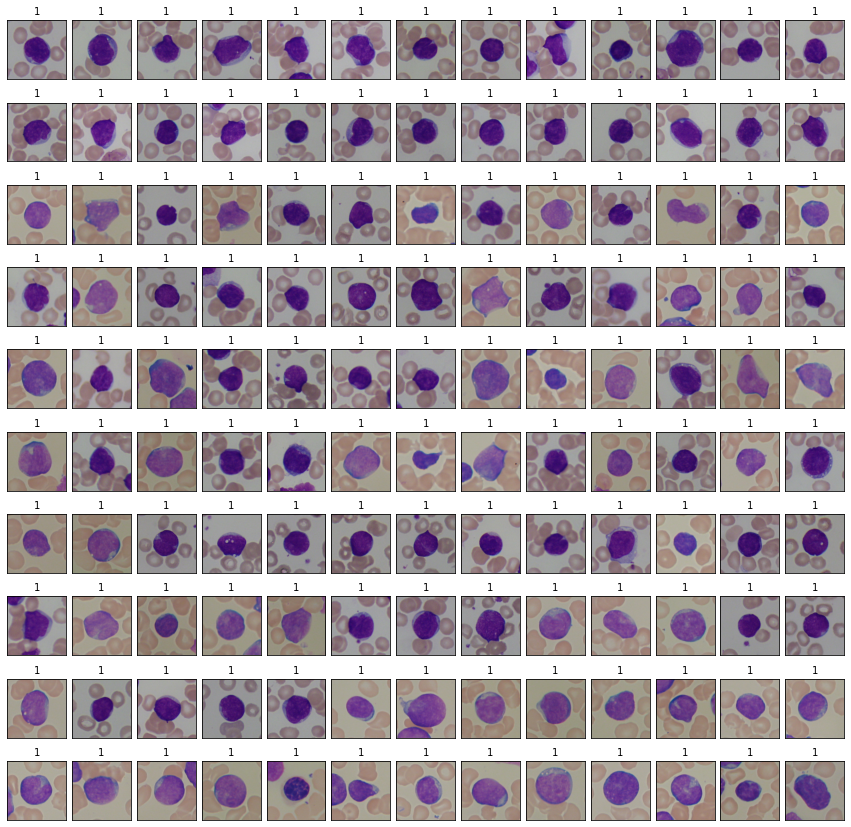

In [335]:
# Create a figure with 10 rows and 13 columns
fig, ax = plt.subplots(10, 13, figsize=(15, 15))

# Loop through the images and their corresponding numbers
for i, (image, number) in enumerate(zip(ALL_list, ALL_labels)):
    # Calculate the row and column indices for the current image
    row = i // 13
    col = i % 13

    # Display the image on the corresponding subplot
    ax[row, col].imshow(image, cmap='gray')

    # Add the number as text above the image
    ax[row, col].set_title(number, fontsize=10)

    # Remove the ticks on the x and y axes
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Display the figure
plt.show()

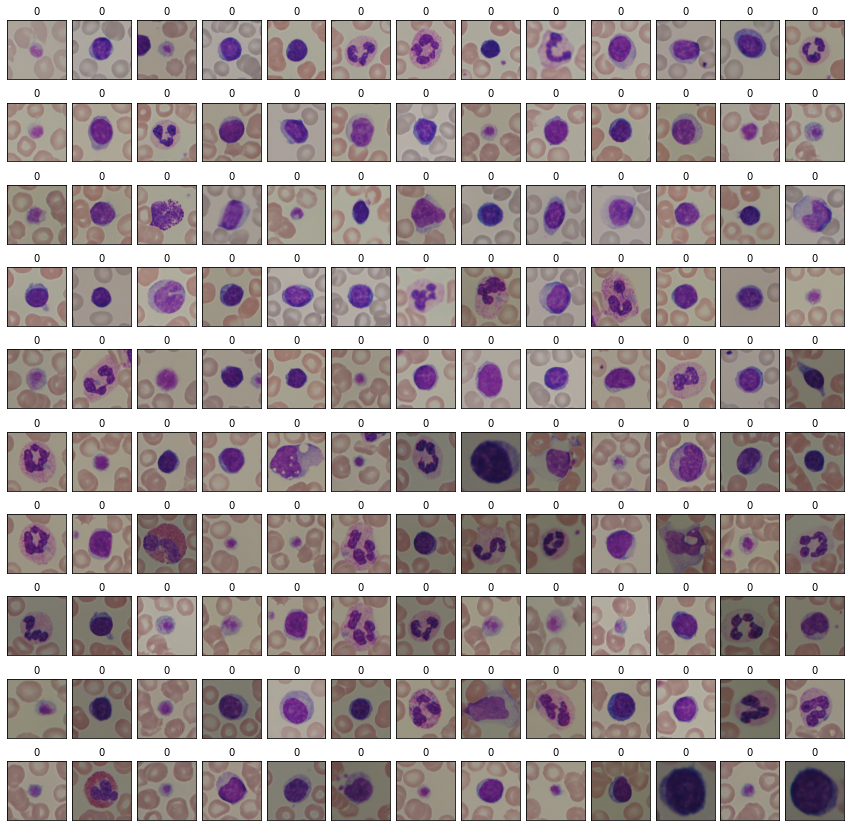

In [336]:
# Create a figure with 10 rows and 13 columns
fig, ax = plt.subplots(10, 13, figsize=(15, 15))

# Loop through the images and their corresponding numbers
for i, (image, number) in enumerate(zip(healthy_list, healthy_labels)):
    # Calculate the row and column indices for the current image
    row = i // 13
    col = i % 13

    # Display the image on the corresponding subplot
    ax[row, col].imshow(image, cmap='gray')

    # Add the number as text above the image
    ax[row, col].set_title(number, fontsize=10)

    # Remove the ticks on the x and y axes
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Display the figure
plt.show()

In [337]:
# Print the shape of the images in the ALL_list and healthy_list lists.
print("The Shape of the images in the ALL_list:", ALL_list[0].shape)
print("The Shape of the images in the list of healthy cells:", healthy_list[0].shape)

The Shape of the images in the ALL_list: (512, 512, 3)
The Shape of the images in the list of healthy cells: (512, 512, 3)


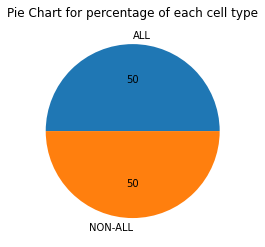

In [338]:
import pandas as pd
import numpy as np

# Get the percentage distribution of ALL and HEM cell images.  
cancer_dict = {"x_col":ALL_list, "y_col":[np.nan for x in range(len(ALL_list))]}
cancer_dict["y_col"] = "ALL"

normal_dict = {"x_col":healthy_list, "y_col":[np.nan for x in range(len(healthy_list))]}
normal_dict["y_col"] = "HEALTHY"


cancer_df = pd.DataFrame(cancer_dict)
normal_df = pd.DataFrame(normal_dict)

#train_df = cancer_df.append(normal_df, ignore_index=True)

plt.pie([len(ALL_list),len(healthy_list)],labels=["ALL","NON-ALL"],autopct='%.f')
plt.title('Pie Chart for percentage of each cell type')
plt.show()
     

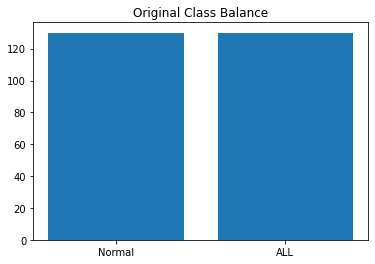

In [339]:
# Show the class balance of ALL and HEM images.
plt.bar(['Normal', 'ALL'], [len(healthy_list), len(ALL_list)])
plt.title('Original Class Balance')
plt.show()

In [340]:
import numpy as np
ALL_list = np.array(ALL_list)
ALL_labels = np.array(ALL_labels)
print("The Shape of the ALL images numpy array:", ALL_list.shape)
print("The Shape of the ALL labels numpy array:", ALL_labels.shape)

healthy_list = np.array(healthy_list)
healthy_labels = np.array(healthy_labels)
print("The Shape of the healthy images numpy array:", healthy_list.shape)
print("The Shape of the healthy labels numpy array:", healthy_labels.shape)

The Shape of the ALL images numpy array: (130, 512, 512, 3)
The Shape of the ALL labels numpy array: (130,)
The Shape of the healthy images numpy array: (130, 512, 512, 3)
The Shape of the healthy labels numpy array: (130,)


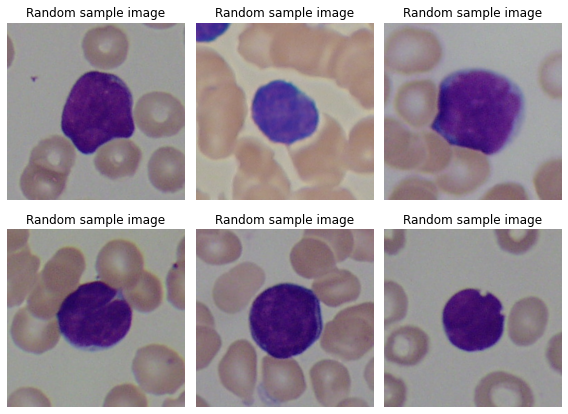

In [341]:
# concatenate both datasets and adjust to print random
import numpy as np

import matplotlib.pyplot as plt
import random

# Select 6 random images from dataset
num_images = 6
selected_images = np.random.choice(len(ALL_list), num_images, replace=False)

# Display selected images
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
for i, ax in enumerate(axes.flat):
    image = ALL_list[selected_images[i]]
    ax.imshow(image)
    ax.set_title('Random sample image')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [342]:
# # Normalize the pixel values in the cropped_images list to the range [0, 255] using cv2.normalize() function.
ALL_normalized_images = []
NON_ALL_normalized_images = []
for img in ALL_list:
    normalized_img = cv2.normalize(img, None, 0, 255, norm_type=cv2.NORM_MINMAX)
    ALL_normalized_images.append(normalized_img)

for img in healthy_list:
    normalized_img = cv2.normalize(img, None, 0, 255, norm_type=cv2.NORM_MINMAX)
    NON_ALL_normalized_images.append(normalized_img)

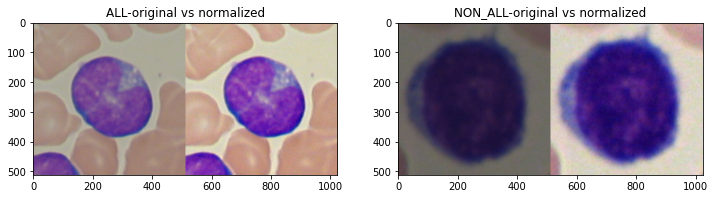

In [343]:
# Set the colormap for data display. 
gray = plt.cm.Greys_r

# Combine the original and normalised image.
combined_ALL = np.hstack((ALL_list[127], ALL_normalized_images[127]))
combined_NON_ALL = np.hstack((healthy_list[127], NON_ALL_normalized_images[127]))
# Set up the axes for plotting.  
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 14))
# This generates a single row of images with two columns and assigns them to 
# a variable `ax`.

# Plot the lightness image
ax[0].imshow(combined_ALL, cmap = gray)
ax[0].set_title('ALL-original vs normalized')

# Plot the a image.
ax[1].imshow(combined_NON_ALL, cmap = gray)
ax[1].set_title('NON_ALL-original vs normalized')
plt.show()

In [252]:
# add code for calculating the center

In [344]:
def split_channels(image):
    # Split the image into separate color channels.
    b_channel, g_channel, r_channel = cv2.split(image)

    # Print the minimum and maximum of red channel.
    print('Minimum value for red channel:', np.min(r_channel))
    print('Maximum value for red channel:', np.max(r_channel))

    # Print the minimum and maximum of green channel.
    print('Minimum value for green channel:', np.min(g_channel))
    print('Maximum value for green channel:', np.max(g_channel))

    # Print the minimum and maximum of blue channel.
    print('Minimum value for blue channel:', np.min(b_channel))
    print('Maximum value for blue channel:', np.max(b_channel))

    return r_channel, g_channel, b_channel

Minimum value for red channel: 107
Maximum value for red channel: 236
Minimum value for green channel: 0
Maximum value for green channel: 238
Minimum value for blue channel: 6
Maximum value for blue channel: 255


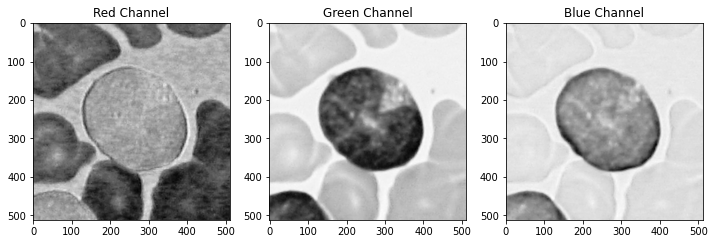

In [254]:
from google.colab.patches import cv2_imshow
r_channel, g_channel, b_channel = split_channels(ALL_normalized_images[127])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 14))
# This generates a single row of images with two columns and assigns them to 
# a variable `ax`.

# Plot the lightness image
ax[0].imshow(r_channel, cmap = gray)
ax[0].set_title('Red Channel')

# Plot the a image.
ax[1].imshow(g_channel, cmap = gray)
ax[1].set_title('Green Channel')

# Plot the a image.
ax[2].imshow(b_channel, cmap = gray)
ax[2].set_title('Blue Channel')
plt.show()

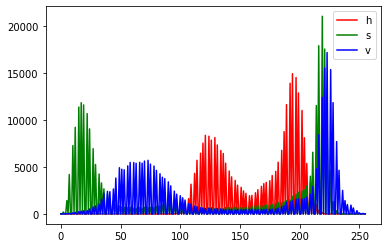

In [345]:
hist_h = cv2.calcHist([r_channel],[0],None,[256],[0,256])
hist_s = cv2.calcHist([g_channel],[0],None,[256],[0,256])
hist_v = cv2.calcHist([b_channel],[0],None,[256],[0,256])
plt.plot(hist_h, color='r', label="h")
plt.plot(hist_s, color='g', label="s")
plt.plot(hist_v, color='b', label="v")
plt.legend()
plt.show()

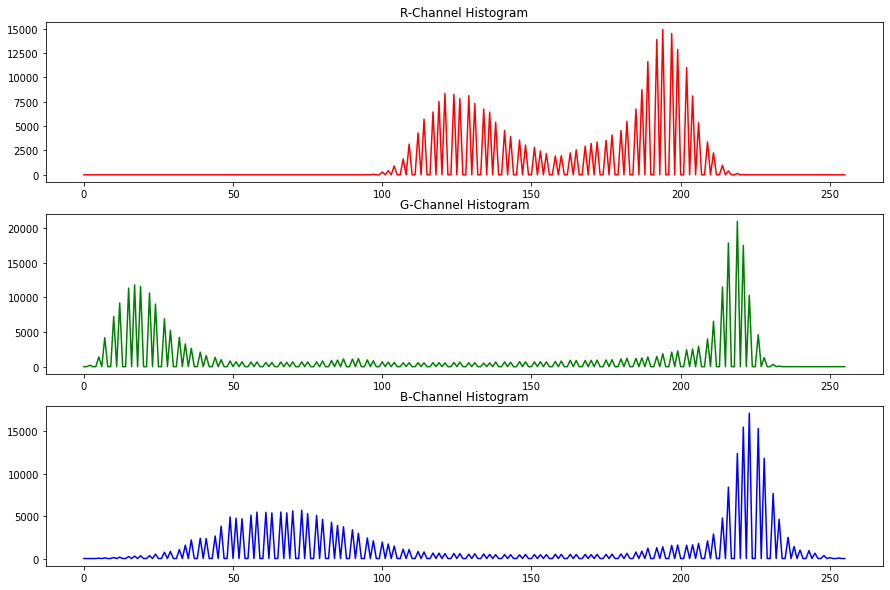

In [346]:
# Set up the axes for plotting.  
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
# This generates a single row of images with two columns and assigns them to 
# a variable `ax`.

# Plot the first image
ax[0].plot(hist_h, color='r')
ax[0].set_title('R-Channel Histogram')

ax[1].plot(hist_s, color='g')
ax[1].set_title('G-Channel Histogram')

ax[2].plot(hist_v, color='b')
ax[2].set_title('B-Channel Histogram')
plt.show()

In [347]:
# Extract the green channel from all images in the normalized_images list.
# Apply Gaussian blur for smoothing to the green channels using GaussianBlur() function.
ALL_blurred_images = []
NON_ALL_blurred_images = []
kernel_size = (7, 7)
sigma_x = 0

for img in ALL_normalized_images:
    # Split the image into separate color channels
    b_channel, g_channel, r_channel = cv2.split(img)

    # Apply Gaussian blur to the green channel
    blurred_g_channel = cv2.GaussianBlur(g_channel, kernel_size, sigma_x)

    # Add the blurred image to the list of blurred images
    ALL_blurred_images.append(blurred_g_channel)

for img in NON_ALL_normalized_images:
    # Split the image into separate color channels
    b_channel, g_channel, r_channel = cv2.split(img)

    # Apply Gaussian blur to the green channel
    blurred_g_channel = cv2.GaussianBlur(g_channel, kernel_size, sigma_x)

    # Add the blurred image to the list of blurred images
    NON_ALL_blurred_images.append(blurred_g_channel)

In [258]:
# add Otsu algorithm implementation for a list of images

In [259]:
# add multiotsu for a list of images

In [348]:
# Initialize an empty list to store the threshold values
ALL_thresholds = []
NON_ALL_thresholds = []

# Loop through each image in blurred_images
for img in ALL_blurred_images:

    # Apply Otsu's thresholding
    ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Append the threshold value to the list
    ALL_thresholds.append(ret)

# Compute the mean threshold value
ALL_mean_threshold = np.mean(ALL_thresholds)
print("A list of all threshold values for blast images: ", ALL_thresholds)
# Print the mean threshold value
print("Mean Threshold for all blast Gaussian Blurred Green Channel images: ", ALL_mean_threshold)

# Loop through each image in blurred_images
for img in NON_ALL_blurred_images:

    # Apply Otsu's thresholding
    ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Append the threshold value to the list
    NON_ALL_thresholds.append(ret)

# Compute the mean threshold value
NON_ALL_mean_threshold = np.mean(NON_ALL_thresholds)
print("A list of all threshold values for healthy images: ", NON_ALL_thresholds)
# Print the mean threshold value
print("Mean Threshold for all healthy Gaussian Blurred Green Channel images: ", NON_ALL_mean_threshold)

A list of all threshold values for blast images:  [115.0, 129.0, 114.0, 121.0, 110.0, 116.0, 112.0, 110.0, 114.0, 113.0, 117.0, 113.0, 114.0, 108.0, 115.0, 111.0, 117.0, 117.0, 116.0, 121.0, 116.0, 117.0, 121.0, 121.0, 122.0, 117.0, 113.0, 131.0, 117.0, 106.0, 120.0, 118.0, 102.0, 116.0, 114.0, 115.0, 129.0, 110.0, 111.0, 124.0, 111.0, 120.0, 116.0, 116.0, 116.0, 111.0, 117.0, 121.0, 123.0, 131.0, 112.0, 118.0, 110.0, 122.0, 135.0, 109.0, 155.0, 114.0, 113.0, 114.0, 102.0, 124.0, 114.0, 114.0, 133.0, 126.0, 109.0, 117.0, 108.0, 129.0, 118.0, 107.0, 126.0, 107.0, 115.0, 114.0, 125.0, 120.0, 114.0, 103.0, 112.0, 117.0, 120.0, 110.0, 111.0, 112.0, 115.0, 115.0, 108.0, 107.0, 113.0, 112.0, 116.0, 104.0, 120.0, 111.0, 114.0, 113.0, 114.0, 122.0, 108.0, 128.0, 125.0, 115.0, 118.0, 118.0, 110.0, 119.0, 117.0, 123.0, 124.0, 123.0, 113.0, 111.0, 133.0, 114.0, 113.0, 124.0, 120.0, 117.0, 121.0, 118.0, 114.0, 116.0, 124.0, 122.0, 120.0, 115.0, 120.0, 118.0]
Mean Threshold for all blast Gaussian B

In [349]:
# Define a list to store the segmented images
ALL_segmented_images = []
NON_ALL_segmented_images = []

# Define a list to store the Canny edge images
ALL_edge_images = []
NON_ALL_edge_images = []

# Loop through each image in blurred_images
for img in ALL_blurred_images:

    # Apply the mean threshold to the image
    binary = cv2.threshold(img, ALL_mean_threshold, 255, cv2.THRESH_BINARY_INV)[1]

    # Append the segmented image to the list
    ALL_segmented_images.append(binary)

    # Find Canny edges of the thresholded image
    edges = cv2.Canny(binary, 70, 150)

    # Append the Canny edged image to the list
    ALL_edge_images.append(edges)


# Loop through each image in blurred_images
for img in NON_ALL_blurred_images:

    # Apply the mean threshold to the image
    binary = cv2.threshold(img, NON_ALL_mean_threshold, 255, cv2.THRESH_BINARY_INV)[1]

    # Append the segmented image to the list
    NON_ALL_segmented_images.append(binary)

    # Find Canny edges of the thresholded image
    edges = cv2.Canny(binary, 70, 150)

    # Append the Canny edged image to the list
    NON_ALL_edge_images.append(edges)

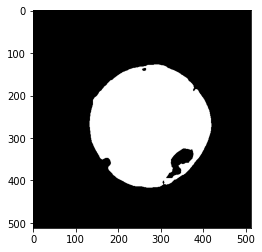

In [350]:
plt.imshow(ALL_segmented_images[79], cmap = gray)
plt.show()

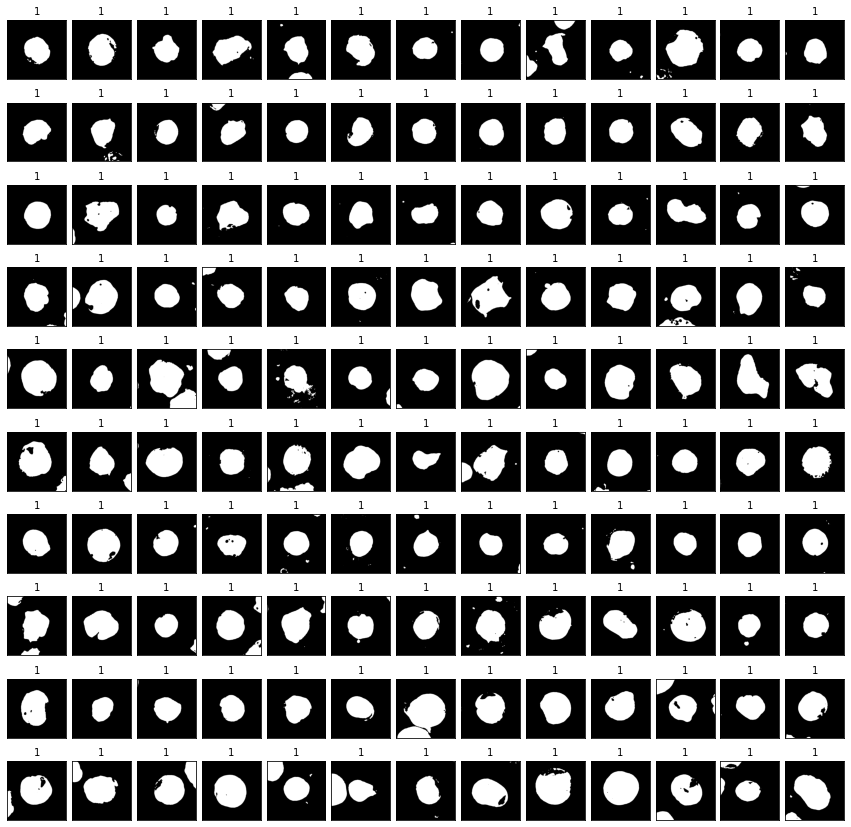

In [351]:
# Create a figure with 10 rows and 13 columns
fig, ax = plt.subplots(10, 13, figsize=(15, 15))

# Loop through the images and their corresponding numbers
for i, (image, number) in enumerate(zip(ALL_segmented_images, ALL_labels)):
    # Calculate the row and column indices for the current image
    row = i // 13
    col = i % 13

    # Display the image on the corresponding subplot
    ax[row, col].imshow(image, cmap='gray')

    # Add the number as text above the image
    ax[row, col].set_title(number, fontsize=10)

    # Remove the ticks on the x and y axes
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Display the figure
plt.show()

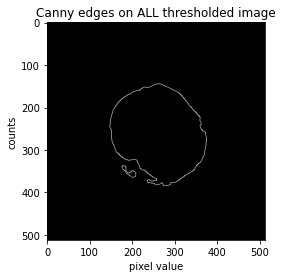

In [352]:
# Display Canny edges for otsu mean thresholded images.
plt.imshow(ALL_edge_images[0], cmap=gray)
plt.title("Canny edges on ALL thresholded image")
plt.xlabel("pixel value")
plt.ylabel("counts")
plt.show()

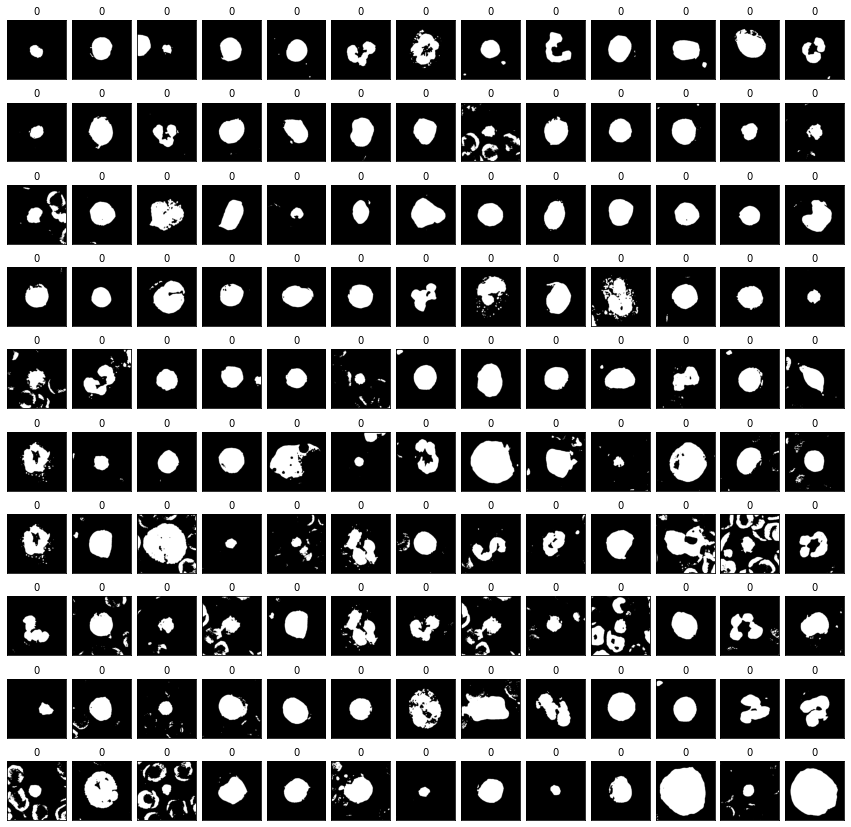

In [353]:
# Create a figure with 10 rows and 13 columns
fig, ax = plt.subplots(10, 13, figsize=(15, 15))

# Loop through the images and their corresponding numbers
for i, (image, number) in enumerate(zip(NON_ALL_segmented_images, healthy_labels)):
    # Calculate the row and column indices for the current image
    row = i // 13
    col = i % 13

    # Display the image on the corresponding subplot
    ax[row, col].imshow(image, cmap='gray')

    # Add the number as text above the image
    ax[row, col].set_title(number, fontsize=10)

    # Remove the ticks on the x and y axes
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Display the figure
plt.show()

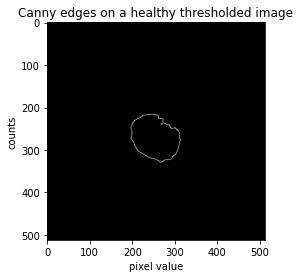

In [354]:
# Display Canny edges for otsu mean thresholded images.
plt.imshow(NON_ALL_edge_images[0], cmap=gray)
plt.title("Canny edges on a healthy thresholded image")
plt.xlabel("pixel value")
plt.ylabel("counts")
plt.show()

In [355]:
# Apply dilation to increase object area in the thresholded images to accentuate features in the image using dilate() function.
# Parameters:
#     src: the input image.
#     dst: output image of the same size and type as src.
#     element: structuring element used for dilation.  
#     iterations: number of times dilation is applied.

# Input image is the thresholded image.
# SE is a kernel/matrix with which image is convolved.
# The image will be dilated 1 time.

# Define a list to store the morphologically processed images
ALL_morph_images = []
NON_ALL_morph_images = []

# Taking a matrix of size 5 as the kernel
kernel = np.ones((5, 5), np.uint8)

# Apply dilation to each segmented image
for segmented_image in ALL_segmented_images:
    opening_image = cv2.morphologyEx(segmented_image, cv2.MORPH_CLOSE, kernel, iterations=1)
    erode = cv2.erode(opening_image, kernel, iterations = 4)
    ALL_morph_images.append(erode)

# Apply dilation to each segmented image
for segmented_image in NON_ALL_segmented_images:
    opening_image = cv2.morphologyEx(segmented_image, cv2.MORPH_OPEN, kernel, iterations=1)
    erode = cv2.erode(opening_image, kernel, iterations = 5)
    NON_ALL_morph_images.append(erode)


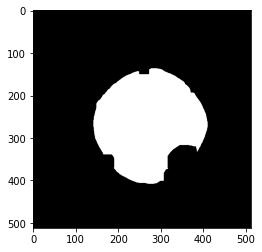

In [356]:
plt.imshow(ALL_morph_images[79], cmap = gray)
plt.show()

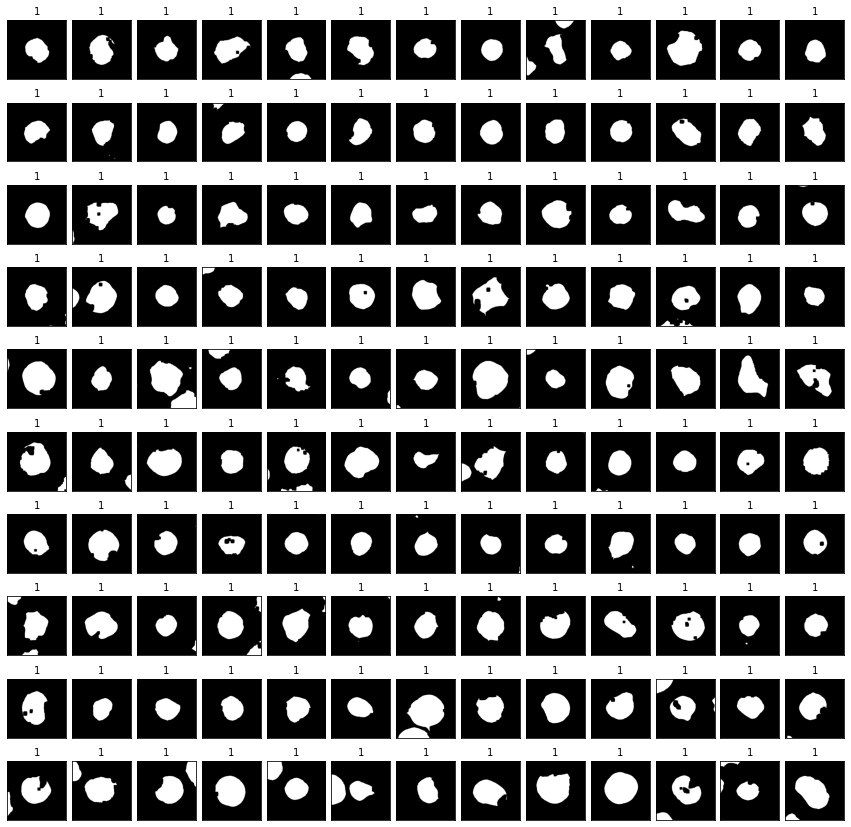

In [357]:
# Create a figure with 10 rows and 13 columns
fig, ax = plt.subplots(10, 13, figsize=(15, 15))

# Loop through the images and their corresponding numbers
for i, (image, number) in enumerate(zip(ALL_morph_images, ALL_labels)):
    # Calculate the row and column indices for the current image
    row = i // 13
    col = i % 13

    # Display the image on the corresponding subplot
    ax[row, col].imshow(image, cmap='gray')

    # Add the number as text above the image
    ax[row, col].set_title(number, fontsize=10)

    # Remove the ticks on the x and y axes
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Display the figure
plt.show()

In [358]:
# add 1 pixel white border all around
# top=1, bottom=1, left=1, right=1 mean that 1 pixel-wide border needs to be built
# value = 0 -> black
# top, bottom, left, right; bordertype; the value for the border pixels
# pad = cv2.copyMakeBorder(flooded_images[90], 1,1,1,1, cv2.BORDER_CONSTANT, value=255)
# height, width = pad.shape
# plt.imshow(pad, cmap = gray)
# print(height, width)

# border cleaning

# Define the padding parameters
top = bottom = left = right = 1

# Define the padding border type and value
border_type = cv2.BORDER_CONSTANT
border_value = 255

# Create an empty list to store the padded images
ALL_border_cleaned = []
NON_ALL_border_cleaned = []

# Iterate over each image in the list and pad it
for img in ALL_morph_images:
    # Pad the image
    padded_img = cv2.copyMakeBorder(img, top, bottom, left, right, border_type, value=border_value)
    
    # Create a zeros mask 2 pixels larger in each dimension
    height, width = padded_img.shape
    mask = np.zeros([height + 2, width + 2], np.uint8)

    # Set the flood fill starting point to be the bottom right corner
    # seed_point = (width - 2, height - 2)
    
    # Floodfill the outer white border with black
    img_floodfill = cv2.floodFill(padded_img, mask, seedPoint=(0,0), newVal=0, loDiff=50, upDiff=50, flags=8)[1]
    
    # Remove the border
    img_floodfill = img_floodfill[1:height-1, 1:width-1]

    # Append the padded image to the list
    ALL_border_cleaned.append(img_floodfill)

# Iterate over each image in the list and pad it
for img in NON_ALL_morph_images:
    # Pad the image
    padded_img = cv2.copyMakeBorder(img, top, bottom, left, right, border_type, value=border_value)
    
    # Create a zeros mask 2 pixels larger in each dimension
    height, width = padded_img.shape
    mask = np.zeros([height + 2, width + 2], np.uint8)

    # Set the flood fill starting point to be the bottom right corner
    # seed_point = (width - 2, height - 2)
    
    # Floodfill the outer white border with black
    img_floodfill = cv2.floodFill(padded_img, mask, seedPoint=(0,0), newVal=0, loDiff=50, upDiff=50, flags=8)[1]
    
    # Remove the border
    img_floodfill = img_floodfill[1:height-1, 1:width-1]

    # Append the padded image to the list
    NON_ALL_border_cleaned.append(img_floodfill)

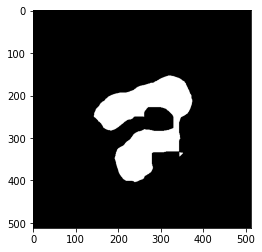

In [359]:
plt.imshow(NON_ALL_border_cleaned[116], cmap = gray)
plt.show()

In [360]:
# Define a list to store the flooded images
ALL_flooded_images = []
NON_ALL_flooded_images = []

# Apply floodFill to each opened image in the list
for border_cleaned in ALL_border_cleaned:

    # Copy the thresholded image.
    im_floodfill = border_cleaned.copy()

    # Mask used to flood filling.
    # The size needs to be 2 pixels than the image.
    h, w = border_cleaned.shape[:2]
    mask_fill = np.zeros((h+2, w+2), np.uint8)

    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask_fill, (0,0), 255)

    # Invert floodfilled image
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.
    flooded = border_cleaned | im_floodfill_inv

    # Append the floded image to the list
    ALL_flooded_images.append(flooded)

# Apply floodFill to each opened image in the list
for border_cleaned in NON_ALL_border_cleaned:

    # Copy the thresholded image.
    im_floodfill = border_cleaned.copy()

    # Mask used to flood filling.
    # The size needs to be 2 pixels than the image.
    h, w = border_cleaned.shape[:2]
    mask_fill = np.zeros((h+2, w+2), np.uint8)

    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask_fill, (0,0), 255)

    # Invert floodfilled image
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.
    flooded = border_cleaned | im_floodfill_inv

    # Append the floded image to the list
    NON_ALL_flooded_images.append(flooded)

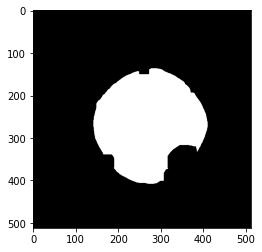

In [361]:
plt.imshow(ALL_flooded_images[79], cmap = gray)
plt.show()

In [362]:
normalized_images = np.concatenate((ALL_normalized_images, NON_ALL_normalized_images))
flooded_images = np.concatenate((ALL_flooded_images, NON_ALL_flooded_images))

print('Length of all normalized images:', len(normalized_images))
print('Length of all flooded images:', len(flooded_images))

labels = np.concatenate((ALL_labels, healthy_labels))
print('Length of all labels:', len(labels))

Length of all normalized images: 260
Length of all flooded images: 260
Length of all labels: 260


In [363]:
from numpy.ma.core import bitwise_and
# Use the mask to remove the background from the original image
# mask_inv = cv2.bitwise_not(im_out)
# cv2_imshow(mask_inv)
# result = cv2.bitwise_and(normalized_images[90], normalized_images[90], mask=img_floodfill)

# Create an empty list to store the results
bitwised_images = []

# Iterate over each image in the list and apply the bitwise and operation
for i in range(len(normalized_images)):
    # Create the mask by using the corresponding border_cleaned image
      mask = flooded_images[i]
      
      # Apply the bitwise and operation
      bitwised = cv2.bitwise_and(normalized_images[i], normalized_images[i], mask=mask)
    
      # Append the result to the list
      bitwised_images.append(bitwised)

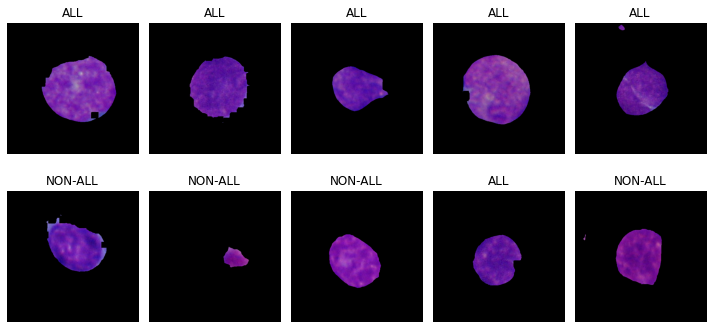

In [364]:
label_names = ['NON-ALL', 'ALL']

# Display 10 random samples
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(bitwised_images))
    ax.imshow(bitwised_images[idx], cmap='gray')
    ax.set_title(label_names[labels[idx]])
    ax.axis('off')
plt.tight_layout()
plt.show()

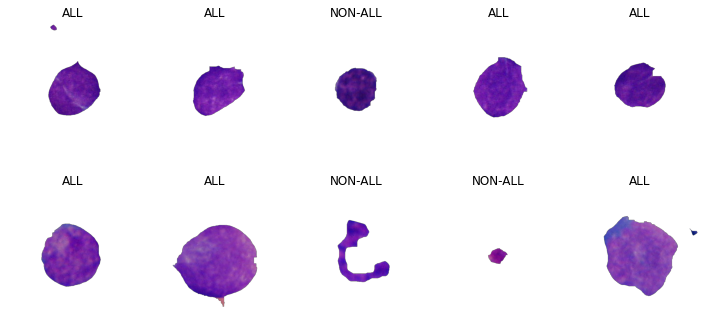

In [365]:
# Create an empty list to store the transparent images
transparent_images = []

# Iterate over each image in the list and apply the transparency mask
for i in range(len(bitwised_images)):
    # Convert the image to grayscale
    gray = cv2.cvtColor(bitwised_images[i], cv2.COLOR_BGR2GRAY)

    # Apply a binary threshold to the grayscale image
    _, alpha = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

    # Split the image into its color channels
    b, g, r = cv2.split(bitwised_images[i])

    # Merge the color channels with the alpha channel to create a transparent image
    rgba = [b, g, r, alpha]
    transparent_img = cv2.merge(rgba, 4)

    # Append the transparent image to the list
    transparent_images.append(transparent_img)



# Display 10 random samples
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(transparent_images))
    ax.imshow(transparent_images[idx], cmap='gray')
    ax.set_title(label_names[labels[idx]])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [366]:
cropped_images = []

for i in range(len(bitwised_images)):
    gray = cv2.cvtColor(bitwised_images[i], cv2.COLOR_BGR2GRAY)
    # gray = segmented[i].copy()
    contours, hierarchy = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    original_img_copy = normalized_images[i].copy()

    if len(contours) > 0:
        if len(contours) > 0 and len(contours) < 2:
            cv2.drawContours(original_img_copy, contours, contourIdx=-1, color=(255, 255, 0), thickness=2)
            x,y,w,h = cv2.boundingRect(contours[0])
            bounded_crop_img = original_img_copy[y:y+h, x:x+w]
            crop_img_not_center = bitwised_images[i][y:y+h, x:x+w]
            if crop_img_not_center.size != 0:
                cropped_images.append(crop_img_not_center)
        if len(contours) > 1:
            center = (gray.shape[1] // 2, gray.shape[0] // 2)
            min_dist = float('inf')
            center_contour = None
            for contour in contours:
                dist = cv2.pointPolygonTest(contour, center, True)
                if dist > 0 and dist < min_dist:
                    min_dist = dist
                    center_contour = contour
            if center_contour is not None:
                cv2.drawContours(original_img_copy, [center_contour], contourIdx=-1, color=(255, 255, 0), thickness=2)
                x, y, w, h = cv2.boundingRect(center_contour)
                cropped_img_center = bitwised_images[i][y:y+h, x:x+w]
                if cropped_img_center.size != 0:
                    cropped_images.append(cropped_img_center)
            else:                              
                contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]
                # draw all three contours onto the blank image
                cv2.drawContours(original_img_copy, contours, contourIdx=-1, color=(255, 255, 0), thickness=2)
                # get the bounding box of the first contour
                x,y,w,h = cv2.boundingRect(np.vstack(contours))
                # crop the region of interest from the original image and the result image
                cropped_original = bitwised_images[i][y:y+h, x:x+w]
                cropped_result = bitwised_images[i][y:y+h, x:x+w]
                cropped_images.append(cropped_result)
print(len(cropped_images))

260


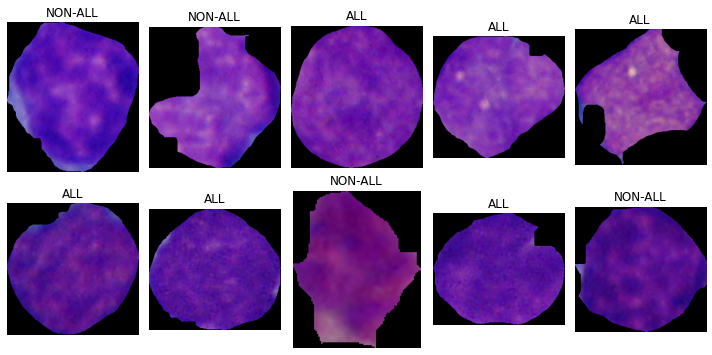

In [367]:
# Display 10 random samples
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(cropped_images))
    ax.imshow(cropped_images[idx], cmap='gray')
    ax.set_title(label_names[labels[idx]])
    ax.axis('off')
plt.tight_layout()
plt.show()

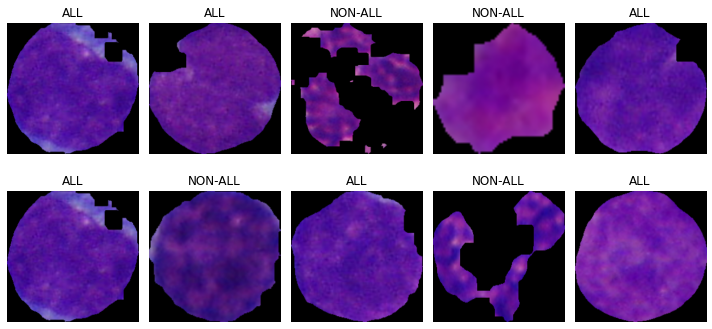

In [368]:
processed_images = []
for image in cropped_images:
    # Split the image into separate color channels
    im_resized = cv2.resize(image, (224, 224), interpolation=cv2.INTER_LINEAR)
    processed_images.append(im_resized)

# Display 10 random samples
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(processed_images))
    ax.imshow(processed_images[idx], cmap='gray')
    ax.set_title(label_names[labels[idx]])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [369]:
print('Length of the pre-processed numpy array of images:', len(processed_images))
print('Shape of a sample pre-processed numpy array of images:', processed_images[3].shape)

Length of the pre-processed numpy array of images: 260
Shape of a sample pre-processed numpy array of images: (224, 224, 3)


In [370]:
processed_images = np.array(processed_images)
print(processed_images.shape)

original_labels = np.concatenate((ALL_labels, healthy_labels))
print(original_labels.shape)

(260, 224, 224, 3)
(260,)


In [371]:
# Converting the array of labels in class matrix with 23 classes
from keras.utils import to_categorical
labels = to_categorical(original_labels)
labels.shape

(260, 2)

In [284]:
# processed_images = processed_images / 255
# processed_images.shape

In [372]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_images, labels, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(208, 224, 224, 3)
(52, 224, 224, 3)
(208, 2)
(52, 2)


In [373]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=42)
print(X_train.shape)
print(X_val.shape)

print(y_train.shape)
print(y_val.shape)

(166, 224, 224, 3)
(42, 224, 224, 3)
(166, 2)
(42, 2)


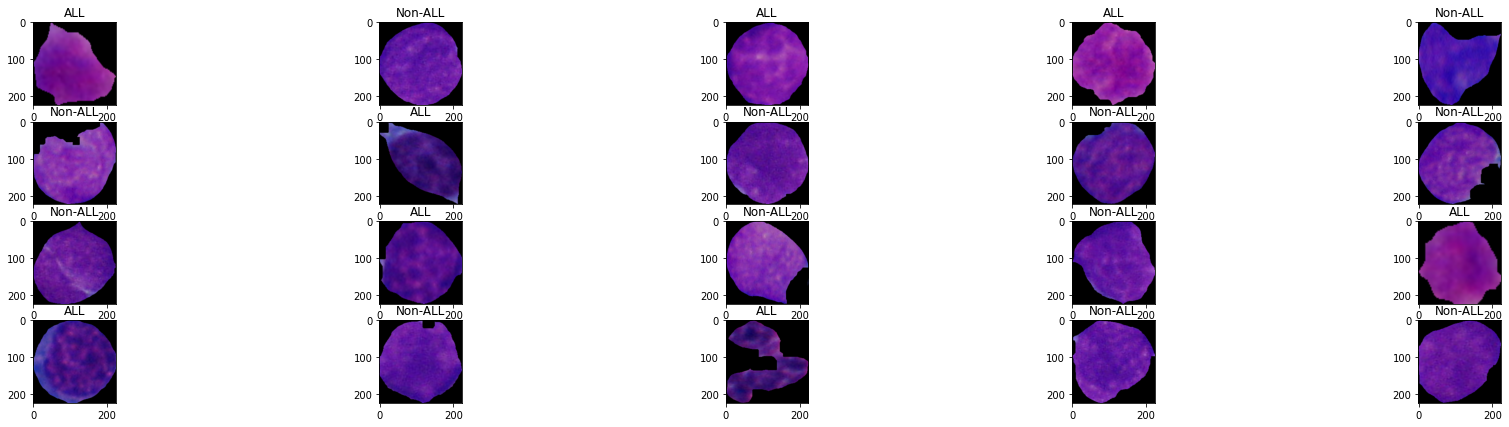

In [374]:
y = np.argmax(y_train, axis=-1)
f, ax = plt.subplots(4, 5, figsize=(30, 7))

for i in range(0, 20):
    ax[i//5, i%5].imshow(X_train[i])
    if y[i]==1:
        ax[i//5, i%5].set_title("Non-ALL")
    else:
        ax[i//5, i%5].set_title("ALL")

In [375]:
# Data augmentation implementation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        # rescale=1./255)
        # rotation_range=8, 
        # zoom_range = 0.1, 
        width_shift_range=0.08, 
        height_shift_range=0.08,  
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.9, 2.3],
        # shear_range=10
        # fill_mode='nearest')
        cval=0) 

In [376]:
# create a generator using flow() method\
train_generator = datagen.flow(X_train, y_train, batch_size=8)

# # plot some sample images
# plt.figure(figsize=(10, 10))
# for images, labels in train_generator:
#     for i in range(9):
#         plt.subplot(3, 3, i+1)
#         plt.imshow(images[i])
#         plt.title(f"Class: {labels[i]}")
#         plt.axis('off')
#     break
# plt.tight_layout()
# plt.show()

In [377]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception

In [378]:
# Load the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for ALL_IDB2 classification
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)


In [379]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [380]:
import keras
# Callback for reducing learning rate
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=5, 
                                            verbose=2, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [381]:
# define an optimizer for the "sharpness-aware" update
# optimizer = SAM(base_optimizer)
# optimizer = keras.optimizers.RMSprop(learning_rate = 0.001, rho=0.9, epsilon=1e-08)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [382]:
history = model.fit(train_generator, 
                    validation_data = (X_val, y_val), 
                    epochs=15,
                    verbose = 2, 
                    steps_per_epoch = X_train.shape[0] // 8,
                    callbacks = [learning_rate_reduction])
                    # callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/15
20/20 - 8s - loss: 1.8807 - accuracy: 0.6139 - val_loss: 0.5804 - val_accuracy: 0.7619 - lr: 1.0000e-04 - 8s/epoch - 396ms/step
Epoch 2/15
20/20 - 2s - loss: 0.4933 - accuracy: 0.8354 - val_loss: 0.2195 - val_accuracy: 0.9048 - lr: 1.0000e-04 - 2s/epoch - 109ms/step
Epoch 3/15
20/20 - 2s - loss: 0.8505 - accuracy: 0.7532 - val_loss: 1.5774 - val_accuracy: 0.5000 - lr: 1.0000e-04 - 2s/epoch - 108ms/step
Epoch 4/15
20/20 - 3s - loss: 0.4502 - accuracy: 0.8418 - val_loss: 0.3137 - val_accuracy: 0.8810 - lr: 1.0000e-04 - 3s/epoch - 140ms/step
Epoch 5/15
20/20 - 2s - loss: 0.2333 - accuracy: 0.9114 - val_loss: 0.3900 - val_accuracy: 0.8571 - lr: 1.0000e-04 - 2s/epoch - 111ms/step
Epoch 6/15
20/20 - 2s - loss: 0.3058 - accuracy: 0.8861 - val_loss: 0.3191 - val_accuracy: 0.9048 - lr: 1.0000e-04 - 2s/epoch - 108ms/step
Epoch 7/15

Epoch 7: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
20/20 - 2s - loss: 0.2140 - accuracy: 0.9177 - val_loss: 0.4435 - val_accuracy

In [383]:
# Evaluating model on validatin data
score = model.evaluate(X_test, y_test)
score

2/2 [==============================] - 0s 80ms/step - loss: 0.1099 - accuracy: 0.9808


[0.10994426906108856, 0.9807692170143127]

In [297]:
# from sklearn.metrics import roc_auc_score

# roc_auc_score(y_test, model.predict_proba(X_test))

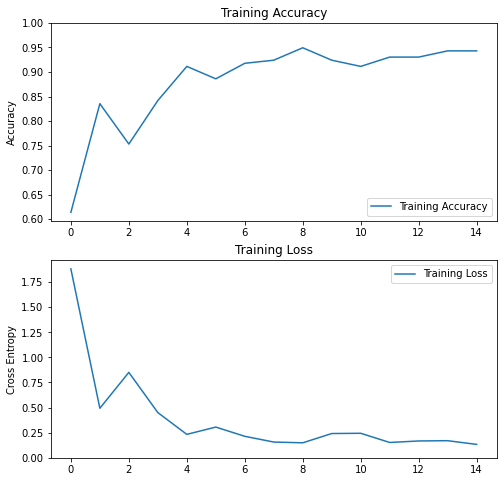

In [384]:
training_acc = history.history['accuracy']
training_loss = history.history['loss']

plt.figure(figsize = (8, 8))
plt.subplot(2, 1, 1)
plt.plot(training_acc, label = 'Training Accuracy')
plt.legend(loc = 'lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy')

plt.subplot(2, 1, 2)
plt.plot(training_loss, label = 'Training Loss')
plt.legend(loc = 'upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training Loss')
plt.show()

In [385]:
# validation_acc = history.history['val_accuracy']
# validation_loss = history.history['val_loss']

# plt.figure(figsize = (8, 8))
# plt.subplot(2, 1, 1)
# plt.plot(validation_acc, label = 'Validation Accuracy')
# plt.legend(loc = 'lower right')
# plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
# plt.title('Validation Accuracy')

# plt.subplot(2, 1, 2)
# plt.plot(validation_loss, label = 'Validation Loss')
# plt.legend(loc = 'upper right')
# plt.ylabel('Cross Entropy')
# plt.ylim([0,max(plt.ylim())])
# plt.title('Validation Loss')
# plt.show()

In [386]:
y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

2/2 [==============================] - 3s 120ms/step


In [387]:
# Importing neccessary libraries for the matrix and plotting
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

# Defininf confusion matrix with the actual validation labels and predicted labels
matrix = confusion_matrix(y_test, y_pred)
matrix


array([[27,  1],
       [ 0, 24]])

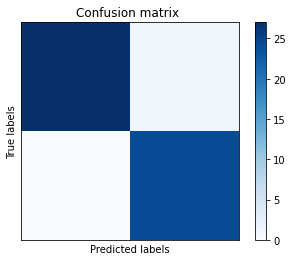

In [388]:
plt.imshow(matrix, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

In [389]:
TN = matrix[0][0]
FN = matrix[0][1]
TP = matrix[1][0]
FP = matrix[1][1]

(TP, FP, TN, FN)

(0, 24, 27, 1)

In [390]:
test_len = len(X_test)

TPP = (TP * 100) / test_len
FPP = (FP * 100) / test_len
FNP = (FN * 100) / test_len
TNP = (TN * 100) / test_len

(TPP, FPP, TNP, FNP)

(0.0, 46.15384615384615, 51.92307692307692, 1.9230769230769231)

In [391]:
specificity = TN/(TN+FP) 
specificity   

0.5294117647058824

In [392]:
specificity = (specificity * 100) / test_len
specificity     

1.0180995475113124

In [393]:
misc = FP + FN
misc

25

In [394]:
misc = (misc * 100) / test_len
misc

48.07692307692308

In [395]:
# Creating a classification report of precission, recall, f1-score values based on validation labels and predicted validation labels 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.96      1.00      0.98        24

    accuracy                           0.98        52
   macro avg       0.98      0.98      0.98        52
weighted avg       0.98      0.98      0.98        52



In [311]:
train_features = base_model.predict(X_train)
val_features = base_model.predict(X_val)
test_features = base_model.predict(X_test)

2/2 [==============================] - 0s 81ms/step


In [312]:
train_features.shape

(166, 7, 7, 2048)

In [313]:
train_features = np.reshape(train_features, (train_features.shape[0], -1))
val_features = np.reshape(val_features, (val_features.shape[0], -1))
test_features = np.reshape(test_features, (test_features.shape[0], -1))

In [314]:
train_features.shape

(166, 100352)

In [315]:
y_train.shape

(166, 2)

In [316]:
y_train = np.argmax(y_train, axis=1)
y_train.shape

(166,)

In [317]:
y_val = np.argmax(y_val, axis=1)
y_val.shape

(42,)

In [318]:
train_features.shape

(166, 100352)

In [319]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Train a linear SVM classifier
# define the parameter grid
param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [320]:
# Define the SVM model with its parameters to be tuned
svm = SVC()

grid_search = GridSearchCV(svm, param_grid, cv=10)
grid_search.fit(val_features, y_val)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Best score:  0.8550000000000001


In [321]:
# train the final model on the combined train and validation set features and labels
final_svm = SVC(kernel = grid_search.best_params_['kernel'], C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
final_svm.fit(np.vstack((train_features, val_features)), np.concatenate((y_train, y_val)))

SVC(C=0.1, gamma=0.001, kernel='linear')

In [322]:
val_score = final_svm.score(val_features, y_val)
print("Validatiom score: ", val_score)

Validatiom score:  1.0


In [323]:
from sklearn.metrics import accuracy_score

# 10. Calculate Performance on Testing set (unseen data)
y_pred = final_svm.predict(test_features)

# 11. Record the model performance accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy:', test_accuracy)

Test Accuracy: 1.0


In [324]:
# best_params = grid_search.best_params_

In [325]:
# # create the SVM with RBF kernel
# svm = SVC(**best_params)

# # create the GridSearchCV object
# grid_search = GridSearchCV(svm, param_grid, cv=10)

# # fit the grid search object to the validation set features and labels
# grid_search.fit(val_features, y_val)

# # print the best parameters and score
# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

In [326]:
# # train the final model on the combined train and validation set features and labels
# final_svm = SVC(kernel='rbf', C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
# final_svm.fit(np.vstack((train_features, val_features)), np.concatenate((y_train, y_val)))

In [327]:
# evaluate the final model on the test set features and labels
# test_score = final_svm.score(test_features, y_test)
# print("Test score: ", test_score)